<a href="https://colab.research.google.com/github/flororsi/Natural_language_processing/blob/main/NLP_analysis_fast_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wikipedia

In [ ]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
machine_learning = wikipedia.page("Machine Learning").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content
print(deep_learning)

artificial_intelligence = sent_tokenize(artificial_intelligence)
machine_learning = sent_tokenize(machine_learning)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

artificial_intelligence.extend(machine_learning)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)

Deep learning  (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains.  Specifically, neural networks tend to be static a

In [ ]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)
        return preprocessed_text

In [ ]:
sent = preprocess_text("Artificial intelligence, is the most advanced technology of the present era")
print(sent)


final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

artificial intelligence advanced technology present


In [ ]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 39.3 s, sys: 115 ms, total: 39.4 s
Wall time: 22.7 s


In [ ]:
print(ft_model.wv['artificial'])

[ 0.11450641  0.10336532  0.39269906 -0.7352629  -0.18130752  0.26943082
  0.36489737 -0.23275432  0.02693624 -0.35989892 -0.07554847 -0.94468135
 -0.58958024 -0.3136937  -0.06872763 -0.03481399 -0.36506584  0.29557052
 -0.09155024  0.31631738 -0.25066307  0.10519376 -0.03672641 -0.60469323
  0.20738661 -0.56010413  0.2202678   0.39565018 -0.5024215  -0.2383197
 -0.06369072 -0.342222   -0.23715597 -0.19952905 -0.07729646 -0.27283093
  0.15318353  0.2128133  -0.16065668 -0.20964225 -0.56956416  0.08948728
  0.04071273  0.18154065 -0.21308355 -0.05977246  0.31955767 -0.00875475
 -0.3459855  -0.2648886  -0.09915003  0.5774186  -0.23175883  0.15515131
 -0.141396   -0.4031267  -0.05670531  0.12638922  0.00456321  0.16397066]


In [ ]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'inspired', 'moral', 'collection', 'creating']
intelligence:['artificial', 'intelligent', 'cognition', 'ethic', 'research']
machine:['learning', 'ethic', 'concerned', 'intelligence', 'algorithm']
network:['neural', 'deep', 'recurrent', 'belief', 'connectionist']
recurrent:['convolutional', 'vision', 'deep', 'network', 'shallow']
deep:['speech', 'network', 'neural', 'generative', 'cnns']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(ft_model.wv.similarity(w1='artificial', w2='intelligence'))

0.7710201


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['artificial', 'intelligence', 'inspired', 'moral', 'collection', 'creating', 'intelligence', 'artificial', 'intelligent', 'cognition', 'ethic', 'research', 'machine', 'learning', 'ethic', 'concerned', 'intelligence', 'algorithm', 'network', 'neural', 'deep', 'recurrent', 'belief', 'connectionist', 'recurrent', 'convolutional', 'vision', 'deep', 'network', 'shallow', 'deep', 'speech', 'network', 'neural', 'generative', 'cnns']
<class 'list'>
36


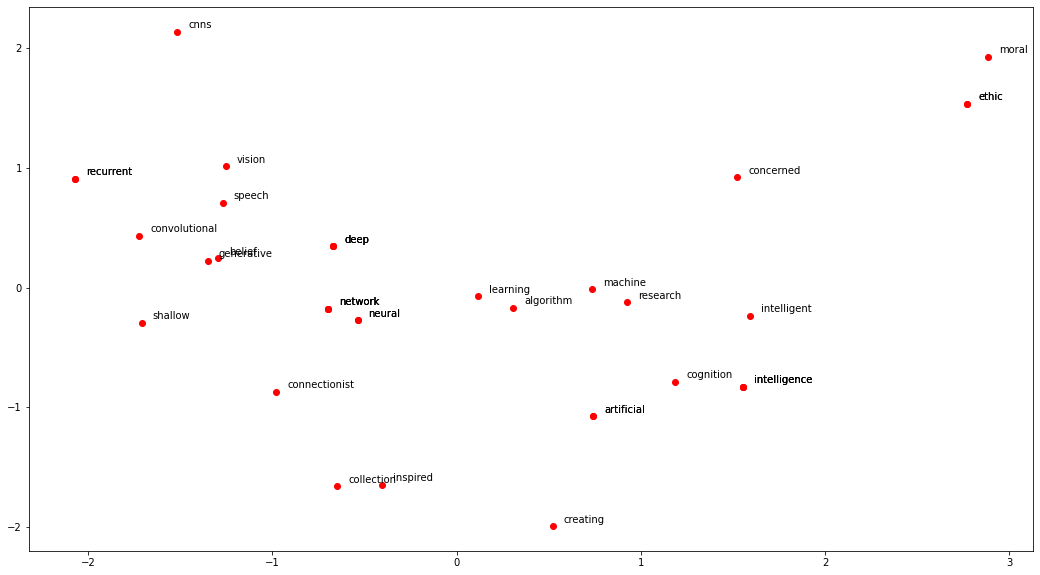

In [ ]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [ ]:
import pandas as pd
import numpy as np
import os

yelp_reviews = pd.read_csv('yelp_mini.csv')

bins = [0,2,5]
review_names = ['negative', 'positive']

yelp_reviews['reviews_score'] = pd.cut(yelp_reviews['stars'], bins, labels=review_names)

yelp_reviews.head()

,user_id,text,date,review_id,business_id,funny,cool,useful,stars,reviews_score
0,b'hG7b0MtEbXx5QzbzE6C_VA',b'Total bill for this horrible service? Over $...,b'2013-05-07 04:34:36',b'Q1sbwvVQXV2734tPgoKj4Q',b'ujmEBvifdJM6h6RLv4wQIg',1,0,6,1,negative
1,b'yXQM5uF2jS6es16SJzNHfg',"b""I *adore* Travis at the Hard Rock's new Kell...",b'2017-01-14 21:30:33',b'GJXCdrto3ASJOqKeVWPi6Q',b'NZnhc2sEQy3RmzKTZnqtwQ',0,0,0,5,positive
2,b'n6-Gk65cPZL6Uz8qRm3NYw',"b""I have to say that this office really has it...",b'2016-11-09 20:09:03',b'2TzJjDVDEuAW6MR5Vuc1ug',b'WTqjgwHlXbSFevF32_DJVw',0,0,3,5,positive
3,b'dacAIZ6fTM6mqwW5uxkskg',"b""Went in for a lunch. Steak sandwich was deli...",b'2018-01-09 20:56:38',b'yi0R0Ugj_xUx_Nek0-_Qig',b'ikCg8xy5JIg_NGPx-MSIDA',0,0,0,5,positive
4,b'ssoyf2_x0EQMed6fgHeMyQ',b'Today was my second out of three sessions I ...,b'2018-01-30 23:07:38',b'11a8sVPMUFtaC7_ABRkmtw',b'b1b1eb3uo-w561D0ZfCEiQ',0,0,7,1,negative


In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.1.0.zip

--2020-09-19 21:06:37--  https://github.com/facebookresearch/fastText/archive/v0.1.0.zip
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0 [following]
--2020-09-19 21:06:37--  https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.1.0.zip’

v0.1.0.zip              [ <=>                ]  92.06K  --.-KB/s    in 0.03s   

2020-09-19 21:06:37 (3.41 MB/s) - ‘v0.1.0.zip’ saved [94267]



In [ ]:
!unzip v0.1.0.zip

Archive:  v0.1.0.zip
431c9e2a9b5149369cc60fb9f5beba58dcf8ca17
   creating: fastText-0.1.0/
  inflating: fastText-0.1.0/.gitignore  
  inflating: fastText-0.1.0/CONTRIBUTING.md  
  inflating: fastText-0.1.0/LICENSE  
  inflating: fastText-0.1.0/Makefile  
  inflating: fastText-0.1.0/PATENTS  
  inflating: fastText-0.1.0/README.md  
  inflating: fastText-0.1.0/classification-example.sh  
  inflating: fastText-0.1.0/classification-results.sh  
  inflating: fastText-0.1.0/eval.py  
  inflating: fastText-0.1.0/get-wikimedia.sh  
  inflating: fastText-0.1.0/pretrained-vectors.md  
  inflating: fastText-0.1.0/quantization-example.sh  
  inflating: fastText-0.1.0/quantization-results.sh  
   creating: fastText-0.1.0/src/
  inflating: fastText-0.1.0/src/args.cc  
  inflating: fastText-0.1.0/src/args.h  
  inflating: fastText-0.1.0/src/dictionary.cc  
  inflating: fastText-0.1.0/src/dictionary.h  
  inflating: fastText-0.1.0/src/fasttext.cc  
  inflating: fastText-0.1.0/src/fasttext.h  
  inflat

In [ ]:
cd fastText010


/content/fastText010


In [ ]:
!make

c++ -pthread -std=c++0x -O3 -funroll-loops -c src/args.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/dictionary.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/productquantizer.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/qmatrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/vector.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/model.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/utils.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/fasttext.cc
c++ -pthread -std=c++0x -O3 -funroll-loops args.o dictionary.o productquantizer.o matrix.o qmatrix.o vector.o model.o utils.o fasttext.o src/main.cc -o fasttext


In [ ]:
!./fasttext

usage: fasttext <command> <args>

The commands supported by fasttext are:

  supervised              train a supervised classifier
  quantize                quantize a model to reduce the memory usage
  test                    evaluate a supervised classifier
  predict                 predict most likely labels
  predict-prob            predict most likely labels with probabilities
  skipgram                train a skipgram model
  cbow                    train a cbow model
  print-word-vectors      print word vectors given a trained model
  print-sentence-vectors  print sentence vectors given a trained model
  nn                      query for nearest neighbors
  analogies               query for analogies



In [ ]:
import pandas as pd
from io import StringIO
import csv

col = ['reviews_score', 'text']

yelp_reviews = yelp_reviews[col]

yelp_reviews['reviews_score']=['__label__'+ str(s) for s in yelp_reviews['reviews_score']]
yelp_reviews['text']= yelp_reviews['text'].replace('\n',' ', regex=True).replace('\t',' ', regex=True)
yelp_reviews.to_csv('yelp_reviews_updated2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
yelp_reviews.head()


,reviews_score,text
0,__label__negative,b'Total bill for this horrible service? Over $...
1,__label__positive,"b""I *adore* Travis at the Hard Rock's new Kell..."
2,__label__positive,"b""I have to say that this office really has it..."
3,__label__positive,"b""Went in for a lunch. Steak sandwich was deli..."
4,__label__negative,b'Today was my second out of three sessions I ...


In [ ]:
!head -n 40000 "yelp_reviews_updated2.txt" > "yelp_reviews_train.txt"
!tail -n 10000 "yelp_reviews_updated2.txt" > "yelp_reviews_test.txt"

In [ ]:
%%time
!./fasttext supervised -input "yelp_reviews_train.txt" -output model_yelp_reviews

Read 0M words
Number of words:  11245
Number of labels: 3
Progress: 100.0%  words/sec/thread: 4363040  lr: 0.000000  loss: 0.951040  eta: 0h0m 
CPU times: user 4.42 ms, sys: 7.03 ms, total: 11.4 ms
Wall time: 722 ms


In [ ]:
!ls

args.o			   matrix.o		    src
classification-example.sh  model.o		    tutorials
classification-results.sh  model_yelp_reviews.bin   utils.o
CONTRIBUTING.md		   model_yelp_reviews.vec   vector.o
dictionary.o		   PATENTS		    wikifil.pl
eval.py			   pretrained-vectors.md    word-vector-example.sh
fasttext		   productquantizer.o	    yelp_mini.csv
fasttext.o		   qmatrix.o		    yelp_reviews_test.txt
get-wikimedia.sh	   quantization-example.sh  yelp_reviews_train.txt
LICENSE			   quantization-results.sh  yelp_reviews_updated2.txt
Makefile		   README.md		    yelp_reviews_updated.txt


In [ ]:
!./fasttext test model_yelp_reviews.bin "yelp_reviews_test.txt"

N	493
P@1	0.748
R@1	0.748
Number of examples: 493


In [ ]:
!cat "yelp_reviews_train.txt" | sed -e "s/\([.\!?,’/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > "yelp_reviews_train_clean.txt"

In [ ]:
!cat "yelp_reviews_test.txt" | sed -e "s/\([.\!?,’/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > "yelp_reviews_test_clean.txt"

In [ ]:
%%time
!./fasttext supervised -input "yelp_reviews_train_clean.txt" -output model_yelp_reviews

Read 0M words
Number of words:  7149
Number of labels: 3
Progress: 100.0%  words/sec/thread: 5122692  lr: 0.000000  loss: 0.826098  eta: 0h0m 
CPU times: user 5.44 ms, sys: 6.07 ms, total: 11.5 ms
Wall time: 517 ms


In [ ]:
!./fasttext test model_yelp_reviews.bin "yelp_reviews_test_clean.txt"

N	493
P@1	0.748
R@1	0.748
Number of examples: 493


In [ ]:
%%time
!./fasttext supervised -input "yelp_reviews_train_clean.txt" -output model_yelp_reviews -epoch 30 -lr 0.5

Read 0M words
Number of words:  7149
Number of labels: 3
Progress: 100.0%  words/sec/thread: 5285820  lr: 0.000000  loss: 0.227681  eta: 0h0m 
CPU times: user 6.66 ms, sys: 9.02 ms, total: 15.7 ms
Wall time: 727 ms
